# Data Visualization : explorando com Seaborn

### aula 1 : importando e traduzindo os dados

## importando a base de dados

https://pandas.pydata.org/docs/reference/index.html

In [1]:
import pandas as pd

In [2]:
dados = pd.read_csv('dados/tips.csv', sep=',')

In [3]:
dados.head(10)

,total_bill,tip,dessert,day,time,size
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4
5,25.29,4.71,No,Sun,Dinner,4
6,8.77,2.00,No,Sun,Dinner,2
7,26.88,3.12,No,Sun,Dinner,4
8,15.04,1.96,No,Sun,Dinner,2
9,14.78,3.23,No,Sun,Dinner,2


## traduzindo os dados

In [4]:
dados.columns

Index(['total_bill', 'tip', 'dessert', 'day', 'time', 'size'], dtype='object')

In [5]:
renomear = {
    'total_bill': 'total_conta',
    'tip': 'valor_gorjeta', 
    'dessert': 'com_sobremesa', 
    'day': 'dia_semana', 
    'time': 'hora_refeição', 
    'size':  'nº_pessoas'
}

In [6]:
gorjetas = dados.rename(columns = renomear)

In [7]:
gorjetas.head(5)

,total_conta,valor_gorjeta,com_sobremesa,dia_semana,hora_refeição,nº_pessoas
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4


In [8]:
gorjetas.com_sobremesa.unique()

array(['No', 'Yes'], dtype=object)

In [9]:
gorjetas.dia_semana.unique()

array(['Sun', 'Sat', 'Thur', 'Fri'], dtype=object)

In [10]:
gorjetas.hora_refeição.unique()

array(['Dinner', 'Lunch'], dtype=object)

In [11]:
sim_nao ={
    'No': 'não',
    'Yes': 'sim'
}

In [12]:
gorjetas.com_sobremesa = gorjetas.com_sobremesa.map(sim_nao)

In [13]:
semana = {
    'Sun': 'domingo',
    'Sat': 'sábado',
    'Thur': 'quinta-feira',
    'Fri': 'sexta-feira'
}

In [14]:
gorjetas.dia_semana = gorjetas.dia_semana.map(semana)

In [15]:
refeicao = {
    'Dinner': 'jantar',
    'Lunch': 'almoço'
}

In [16]:
gorjetas.hora_refeição = gorjetas.hora_refeição.map(refeicao)

In [17]:
gorjetas

,total_conta,valor_gorjeta,com_sobremesa,dia_semana,hora_refeição,nº_pessoas
0,16.99,1.01,não,domingo,jantar,2
1,10.34,1.66,não,domingo,jantar,3
2,21.01,3.50,não,domingo,jantar,3
3,23.68,3.31,não,domingo,jantar,2
4,24.59,3.61,não,domingo,jantar,4
...,...,...,...,...,...,...
239,29.03,5.92,não,sábado,jantar,3
240,27.18,2.00,sim,sábado,jantar,2
241,22.67,2.00,sim,sábado,jantar,2
242,17.82,1.75,não,sábado,jantar,2


## exportando a base de dados atualizada

In [18]:
gorjetas.to_csv('dados/gorjetas.csv', sep=',', index= False)

In [19]:
dados2 = pd.read_csv('dados/gorjetas.csv', sep=',')

In [20]:
dados2.head(10)

,total_conta,valor_gorjeta,com_sobremesa,dia_semana,hora_refeição,nº_pessoas
0,16.99,1.01,não,domingo,jantar,2
1,10.34,1.66,não,domingo,jantar,3
2,21.01,3.50,não,domingo,jantar,3
3,23.68,3.31,não,domingo,jantar,2
4,24.59,3.61,não,domingo,jantar,4
5,25.29,4.71,não,domingo,jantar,4
6,8.77,2.00,não,domingo,jantar,2
7,26.88,3.12,não,domingo,jantar,4
8,15.04,1.96,não,domingo,jantar,2
9,14.78,3.23,não,domingo,jantar,2


In [21]:
dados2.tail() # exibe as ultimas linhas 5 linhas do dataframe

,total_conta,valor_gorjeta,com_sobremesa,dia_semana,hora_refeição,nº_pessoas
239,29.03,5.92,não,sábado,jantar,3
240,27.18,2.00,sim,sábado,jantar,2
241,22.67,2.00,sim,sábado,jantar,2
242,17.82,1.75,não,sábado,jantar,2
243,18.78,3.00,não,quinta-feira,jantar,2


### aula 2 : comparando distribuições de maneira exploratória

In [22]:
!pip install seaborn

https://seaborn.pydata.org/index.html

In [23]:
import seaborn as sns

In [24]:
!pip show seaborn

Name: seaborn
Version: 0.11.2
Summary: seaborn: statistical data visualization
Home-page: https://seaborn.pydata.org
Author: Michael Waskom
Author-email: mwaskom@gmail.com
License: BSD (3-clause)
Location: c:\users\user\anaconda3\lib\site-packages
Requires: matplotlib, numpy, pandas, scipy
Required-by: 


## Análise 1: total_conta e valor_gorjeta

In [25]:
dados2.columns

Index(['total_conta', 'valor_gorjeta', 'com_sobremesa', 'dia_semana',
       'hora_refeição', 'nº_pessoas'],
      dtype='object')

Text(0.5, 1.0, 'Análise do valor da gorjeta em função do valor da conta')

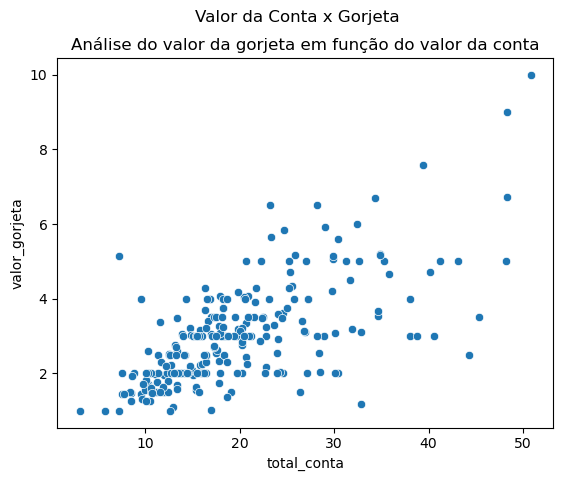

In [26]:
gorjeta = sns.scatterplot(x='total_conta', y='valor_gorjeta', data= dados2)
gorjeta.figure.suptitle('Valor da Conta x Gorjeta')
gorjeta.set_title('Análise do valor da gorjeta em função do valor da conta')

### *Visualmente, o valor da gorjeta aumenta conforme aumenta o valor da conta,*

In [27]:
print('A base de dados contém {} registros \n'.format(dados2.shape[0]))
print("Dados NÃO nulos")
dados2.count()

A base de dados contém 244 registros 

Dados NÃO nulos


total_conta      244
valor_gorjeta    244
com_sobremesa    244
dia_semana       244
hora_refeição    244
nº_pessoas       244
dtype: int64

## criando o campo *porcentagem*

In [28]:
dados2['porcentagem'] = dados2['valor_gorjeta'] / dados2['total_conta']

In [29]:
dados2.head(5)

,total_conta,valor_gorjeta,com_sobremesa,dia_semana,hora_refeição,nº_pessoas,porcentagem
0,16.99,1.01,não,domingo,jantar,2,0.059447
1,10.34,1.66,não,domingo,jantar,3,0.160542
2,21.01,3.50,não,domingo,jantar,3,0.166587
3,23.68,3.31,não,domingo,jantar,2,0.139780
4,24.59,3.61,não,domingo,jantar,4,0.146808


In [30]:
dados2.porcentagem = dados2.porcentagem.round(2)

In [31]:
dados2.head(5)

,total_conta,valor_gorjeta,com_sobremesa,dia_semana,hora_refeição,nº_pessoas,porcentagem
0,16.99,1.01,não,domingo,jantar,2,0.06
1,10.34,1.66,não,domingo,jantar,3,0.16
2,21.01,3.50,não,domingo,jantar,3,0.17
3,23.68,3.31,não,domingo,jantar,2,0.14
4,24.59,3.61,não,domingo,jantar,4,0.15


Text(0.5, 1.0, 'Análise do valor da conta em função do valor da porcentagem da gorjeta')

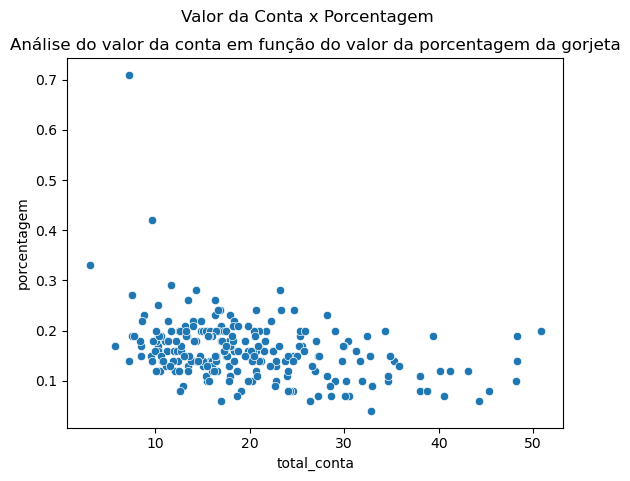

In [32]:
porcentagem_conta = sns.scatterplot(x='total_conta', y='porcentagem', data= dados2)
porcentagem_conta.figure.suptitle('Valor da Conta x Porcentagem')
porcentagem_conta.set_title('Análise do valor da conta em função do valor da porcentagem da gorjeta')

### *porém, o valor da conta não é proporcional ao valor da gorjeta.*

### outras visualizações

Text(0.5, 0.98, 'Valor da Conta x Porcentagem - gráfico de linha')

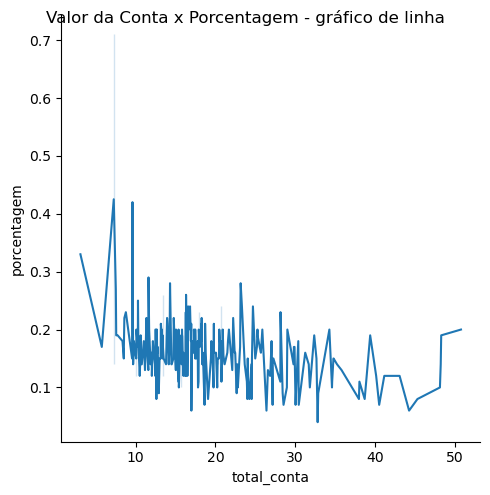

In [33]:
grafico_linha = sns.relplot(x='total_conta', y='porcentagem', kind='line', data= dados2)
grafico_linha.figure.suptitle('Valor da Conta x Porcentagem - gráfico de linha')

Text(0.5, 0.98, 'Valor da Conta x Porcentagem - linha de progressão')

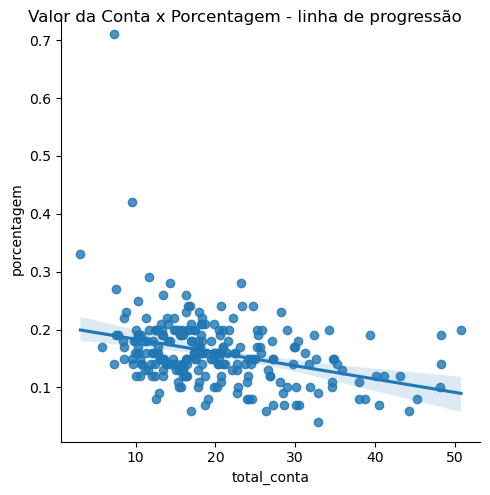

In [34]:
grafico_progressao = sns.lmplot(x='total_conta', y='porcentagem', data= dados2)
grafico_progressao.figure.suptitle('Valor da Conta x Porcentagem - linha de progressão')

In [35]:
imagem_1 = gorjeta.get_figure()

In [36]:
imagem_1.savefig('imagem_1.png')

In [37]:
imagem_2 = porcentagem_conta.get_figure()

In [38]:
imagem_2.savefig('imagem_2.png')

In [39]:
grafico_linha.savefig('grafico_linha.png')

In [40]:
grafico_progressao.savefig('grafico_progressao.png')

### aula 3 : analisando de forma visual e descritiva

## Análise 2: com_sobremesa

#### 1.1 - análise descritiva

In [41]:
dados2.head(5)

,total_conta,valor_gorjeta,com_sobremesa,dia_semana,hora_refeição,nº_pessoas,porcentagem
0,16.99,1.01,não,domingo,jantar,2,0.06
1,10.34,1.66,não,domingo,jantar,3,0.16
2,21.01,3.50,não,domingo,jantar,3,0.17
3,23.68,3.31,não,domingo,jantar,2,0.14
4,24.59,3.61,não,domingo,jantar,4,0.15


In [42]:
dados2[dados2.com_sobremesa == 'sim'].describe()

,total_conta,valor_gorjeta,nº_pessoas,porcentagem
count,93.000000,93.000000,93.000000,93.000000
mean,20.756344,3.008710,2.408602,0.163226
std,9.832154,1.401468,0.810751,0.085060
min,3.070000,1.000000,1.000000,0.040000
25%,13.420000,2.000000,2.000000,0.110000
50%,17.920000,3.000000,2.000000,0.150000
75%,26.860000,3.680000,3.000000,0.200000
max,50.810000,10.000000,5.000000,0.710000


In [43]:
dados2[dados2.com_sobremesa == 'não'].describe()

,total_conta,valor_gorjeta,nº_pessoas,porcentagem
count,151.000000,151.000000,151.000000,151.000000
mean,19.188278,2.991854,2.668874,0.159536
std,8.255582,1.377190,1.017984,0.039889
min,7.250000,1.000000,1.000000,0.060000
25%,13.325000,2.000000,2.000000,0.140000
50%,17.590000,2.740000,2.000000,0.160000
75%,22.755000,3.505000,3.000000,0.185000
max,48.330000,9.000000,6.000000,0.290000


#### 1.2 - análise visual

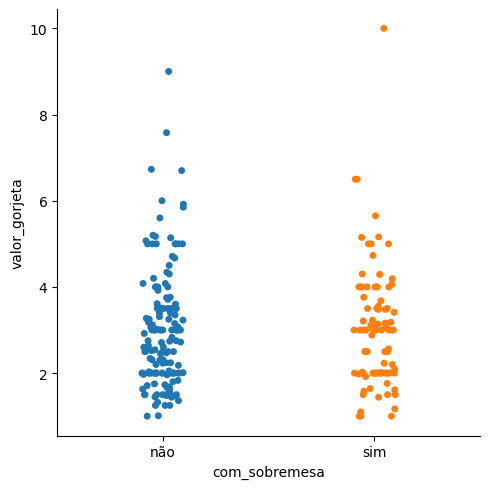

In [44]:
sns.catplot(x='com_sobremesa', y='valor_gorjeta', data=dados2)

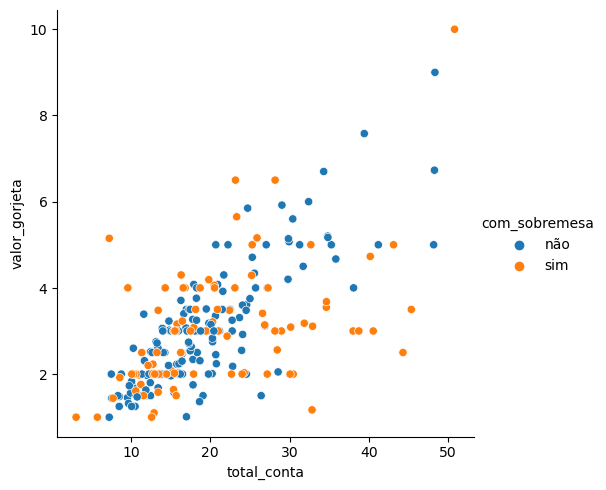

In [45]:
sns.relplot(x='total_conta', y='valor_gorjeta', hue='com_sobremesa', data=dados2)

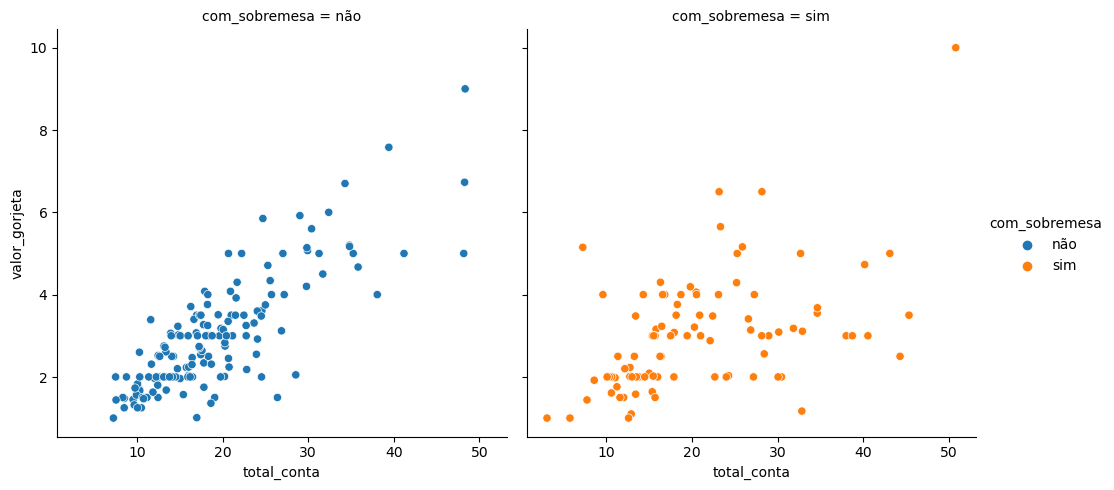

In [46]:
sns.relplot(x='total_conta', y='valor_gorjeta', hue='com_sobremesa', col='com_sobremesa', data=dados2)

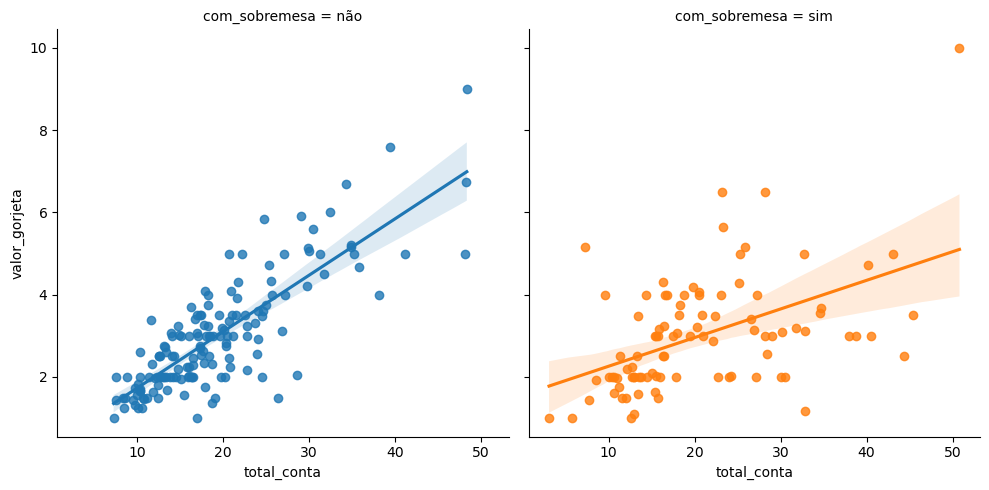

In [47]:
sns.lmplot(x='total_conta', y='valor_gorjeta', hue='com_sobremesa', col='com_sobremesa', data=dados2)

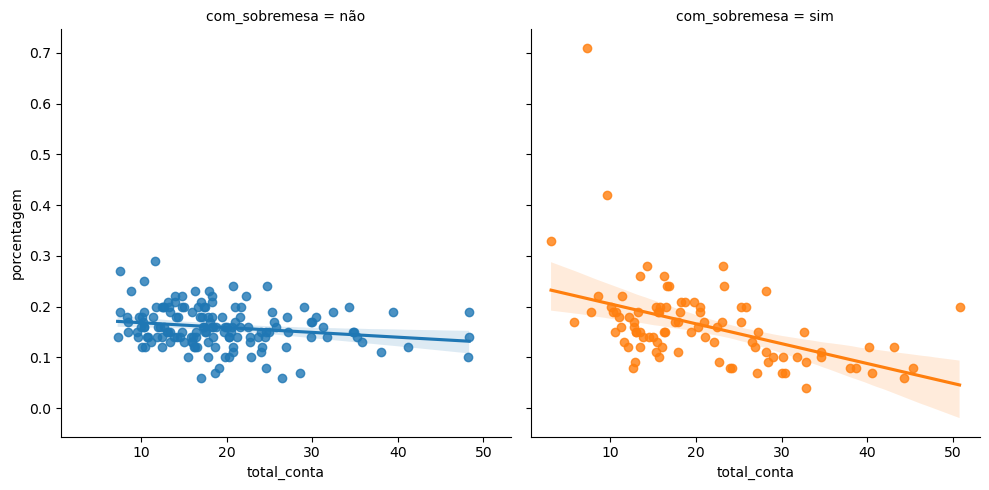

In [48]:
sns.lmplot(x='total_conta', y='porcentagem', hue='com_sobremesa', col='com_sobremesa', data=dados2)

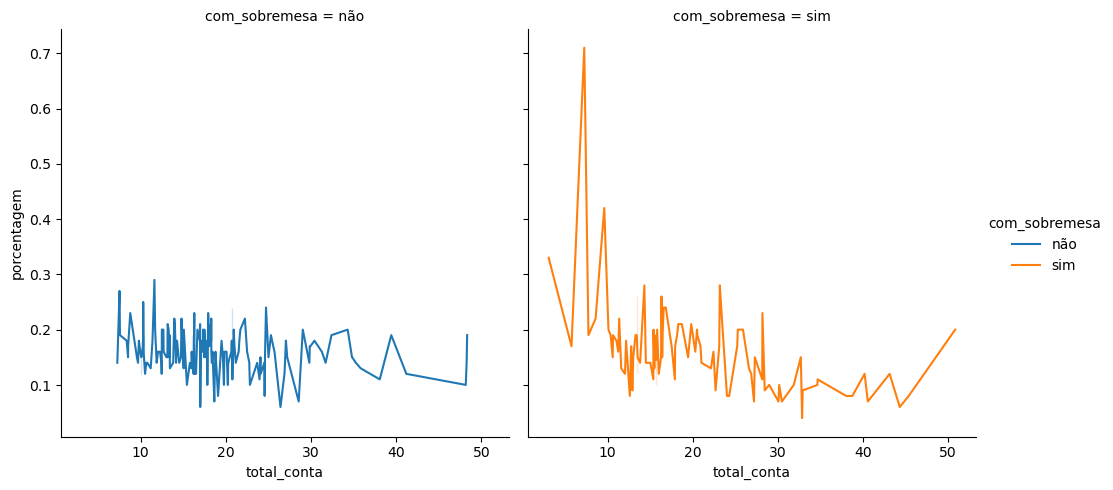

In [49]:
sns.relplot(x='total_conta', y='porcentagem', hue='com_sobremesa', col='com_sobremesa',kind='line', data=dados2)

### *Visualmente, existe uma diferença no valor da gorjeta das contas com e sem sobremesa.*

#### 1.3 - teste de hipótese

**H<sup>Null</sup>**

**A distribuição da taxa de gorjeta é a mesma nos dois grupos**

**H<sup>Alt</sup>**

**A distribuição da taxa de gorjeta não é a mesma nos dois grupos**

In [50]:
from scipy.stats import ranksums

In [51]:
pediram_sobremesa = dados2.query("com_sobremesa == 'sim'").porcentagem

In [52]:
nao_pediram_sobremesa = dados2.query("com_sobremesa == 'não'").porcentagem

In [53]:
r = ranksums(pediram_sobremesa, nao_pediram_sobremesa)

In [54]:
print('O valor do p-value é {}'.format(r.pvalue))

O valor do p-value é 0.5266635660124415


***H<sup>Null</sup>***
***A distribuição da taxa de gorjeta é a mesma nos dois grupos***

O p-value representa a probabilidade daquela amostra ter acontecido dentro da população. Se a chance é pequena, geralmente **p-value < 0,05**, representa que um evento muito raro aconteceu, então optamos por descartar a hipótese nula, e dizer que ela pode não ser verdade.

### aula 4 : comparando e explorando os dias da semana

## Análise 3: dia_semana

In [55]:
dados2.head(5)

,total_conta,valor_gorjeta,com_sobremesa,dia_semana,hora_refeição,nº_pessoas,porcentagem
0,16.99,1.01,não,domingo,jantar,2,0.06
1,10.34,1.66,não,domingo,jantar,3,0.16
2,21.01,3.50,não,domingo,jantar,3,0.17
3,23.68,3.31,não,domingo,jantar,2,0.14
4,24.59,3.61,não,domingo,jantar,4,0.15


In [56]:
dados2.dia_semana.unique()

array(['domingo', 'sábado', 'quinta-feira', 'sexta-feira'], dtype=object)

#### 2.1 - análise visual

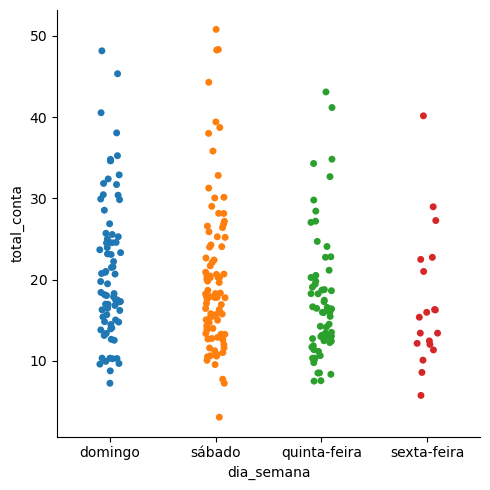

In [57]:
sns.catplot(x='dia_semana', y='total_conta',data=dados2)

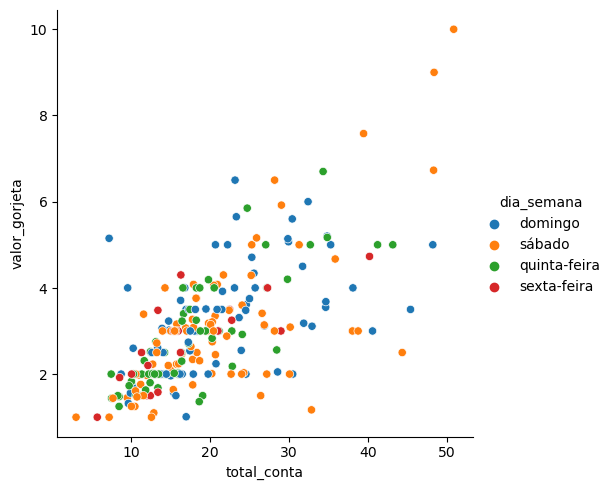

In [58]:
sns.relplot(x='total_conta', y='valor_gorjeta', hue='dia_semana', data=dados2)

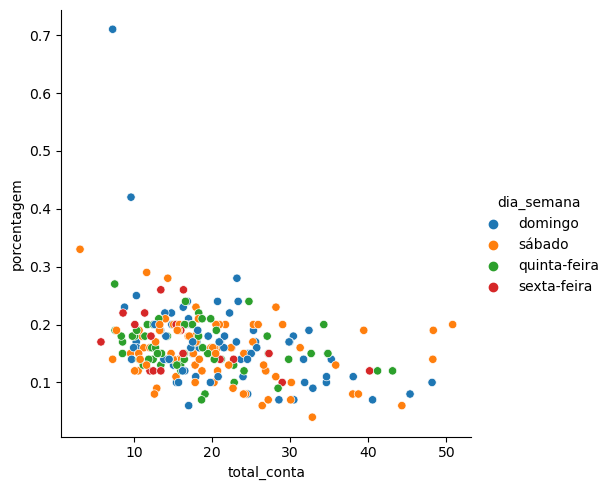

In [59]:
sns.relplot(x='total_conta', y='porcentagem', hue='dia_semana', data=dados2)

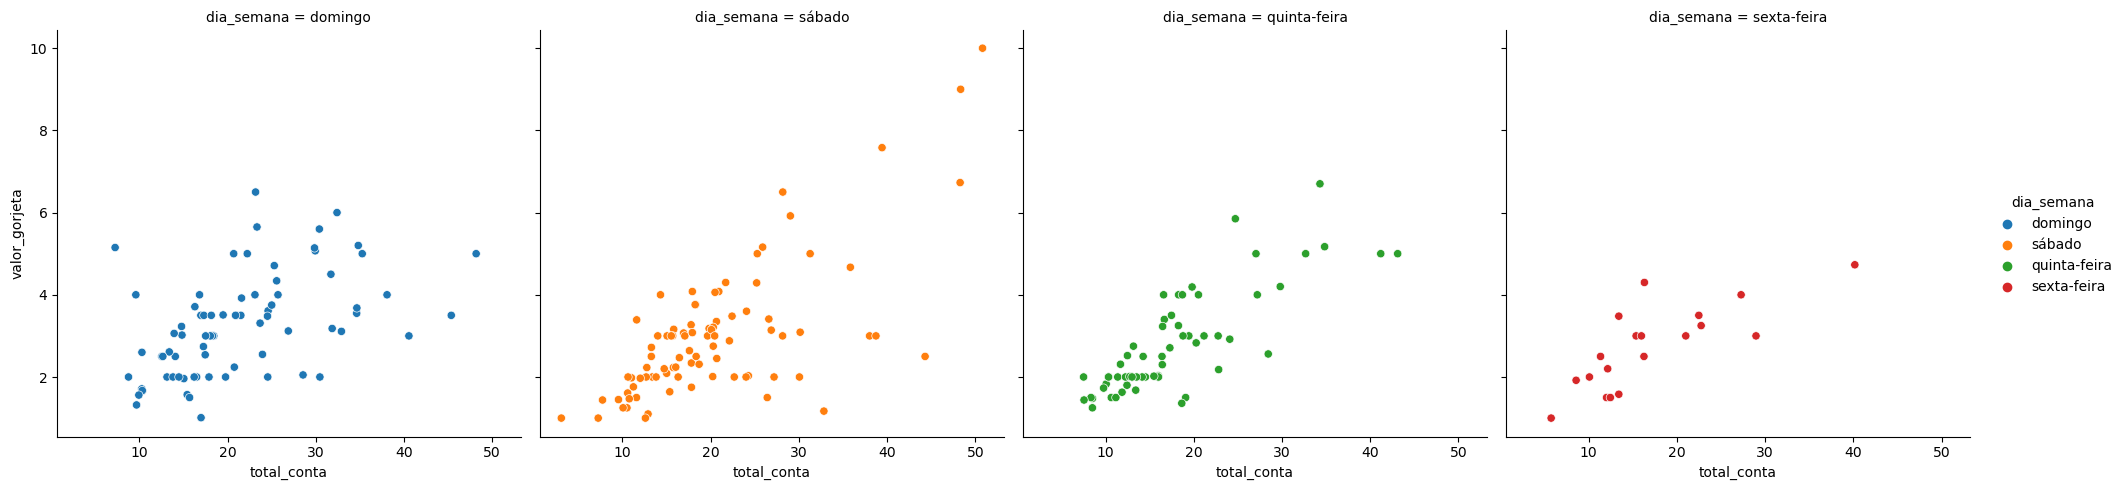

In [60]:
sns.relplot(x='total_conta', y='valor_gorjeta', hue='dia_semana', col='dia_semana', data=dados2)

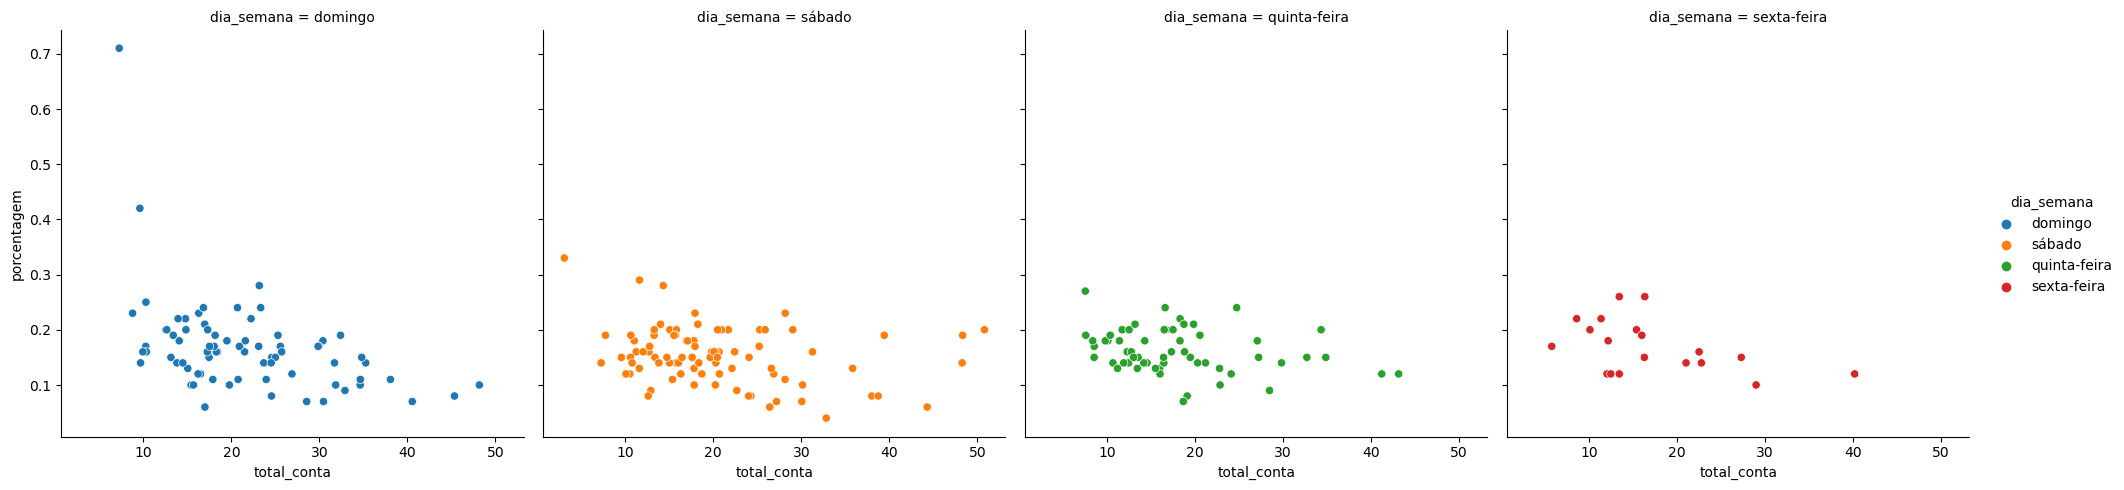

In [61]:
sns.relplot(x='total_conta', y='porcentagem', hue='dia_semana', col='dia_semana', data=dados2)

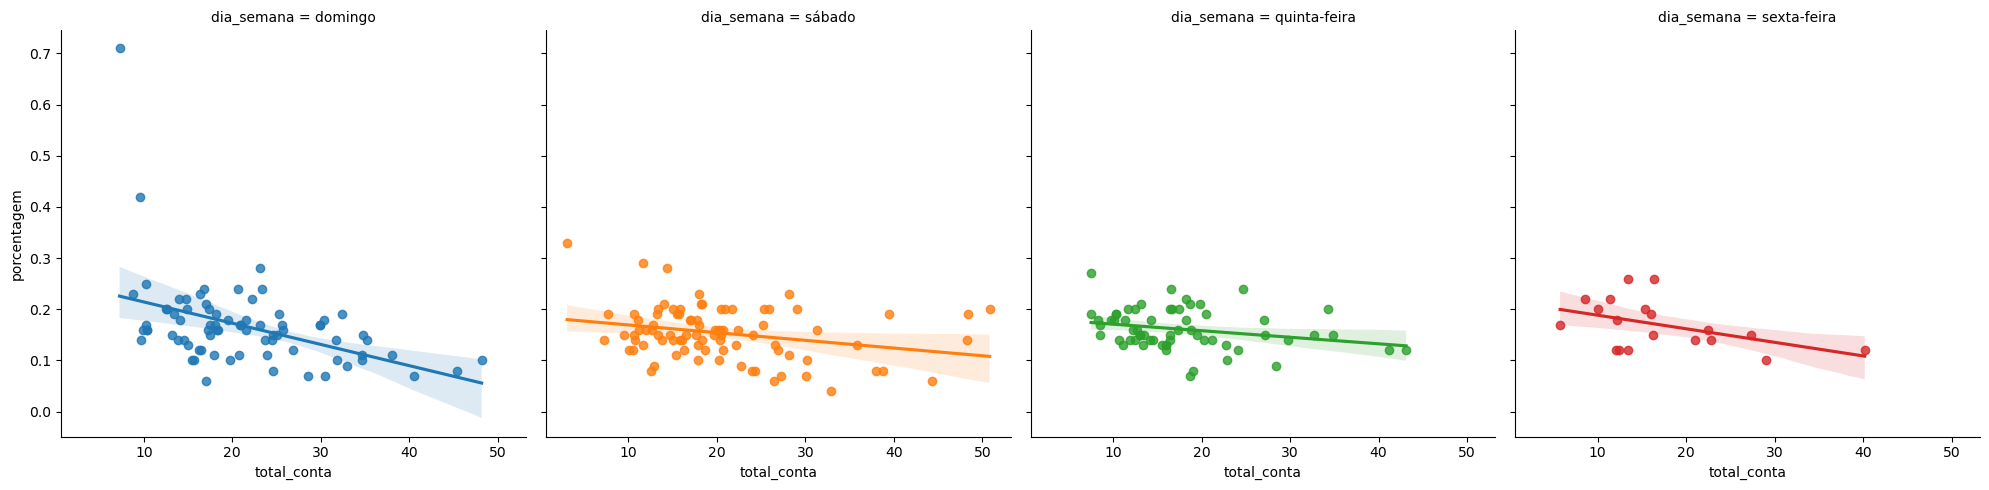

In [62]:
sns.lmplot(x='total_conta', y='porcentagem', hue='dia_semana', col='dia_semana', data=dados2)

#### 2.2 - análise descritiva

In [63]:
media_geral_gorjetas = dados2.valor_gorjeta.mean()

In [64]:
print('A média geral das gorjetas é {}'.format(media_geral_gorjetas))

A média geral das gorjetas é 2.9982786885245902


In [65]:
dados2.groupby(['dia_semana']).mean()[['total_conta', 'valor_gorjeta', 'porcentagem']]

,total_conta,valor_gorjeta,porcentagem
dia_semana,,,
domingo,21.410000,3.255132,0.166974
quinta-feira,17.682742,2.771452,0.161129
sexta-feira,17.151579,2.734737,0.169474
sábado,20.441379,2.993103,0.153678


In [66]:
print('Frequência dos Dias')
dados2.dia_semana.value_counts()

Frequência dos Dias


sábado          87
domingo         76
quinta-feira    62
sexta-feira     19
Name: dia_semana, dtype: int64

#### 2.3 Teste de hipótese

**H<sup>Null</sup>**

**A distribuição do valor da conta é igual no sábado e no domingo**

**H<sup>Alt</sup>**

**A distribuição do valor da conta não é igual no sábado e no domingo**

In [67]:
total_conta_sabado = dados2.query("dia_semana == 'sábado'").total_conta

In [68]:
total_conta_domingo = dados2.query("dia_semana == 'domingo'").total_conta

In [69]:
r1 = ranksums(total_conta_sabado, total_conta_domingo)
print('O valor do p-value é {}'.format(r1.pvalue))

O valor do p-value é 0.3576728477868443


***H<sup>Null</sup>***

***A distribuição do valor da conta é igual no sábado e no domingo***

### aula 5: distribuição de frequência e teste de hipótese

## Análise 4: hora_refeição

In [70]:
dados2.head(5)

,total_conta,valor_gorjeta,com_sobremesa,dia_semana,hora_refeição,nº_pessoas,porcentagem
0,16.99,1.01,não,domingo,jantar,2,0.06
1,10.34,1.66,não,domingo,jantar,3,0.16
2,21.01,3.50,não,domingo,jantar,3,0.17
3,23.68,3.31,não,domingo,jantar,2,0.14
4,24.59,3.61,não,domingo,jantar,4,0.15


In [71]:
dados2.hora_refeição.unique()

array(['jantar', 'almoço'], dtype=object)

#### 3.1 Análise visual (catplot com parametro "swarm", violinplot, boxplot e displot )

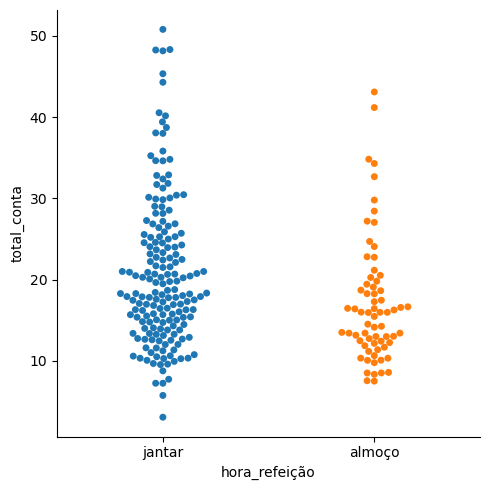

In [72]:
sns.catplot(x='hora_refeição', y='total_conta', kind='swarm', data=dados2)

<AxesSubplot:xlabel='hora_refeição', ylabel='total_conta'>

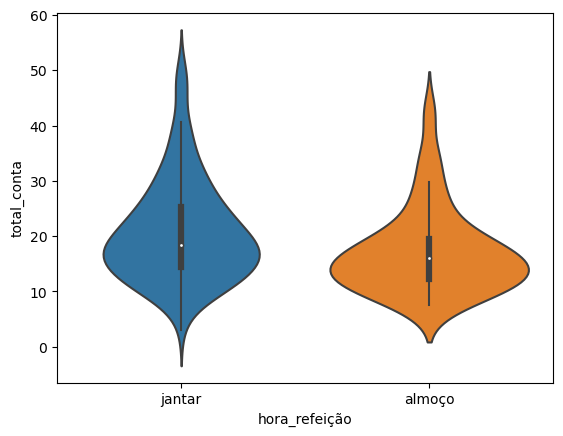

In [73]:
sns.violinplot(x='hora_refeição', y='total_conta', data=dados2)

<AxesSubplot:xlabel='hora_refeição', ylabel='total_conta'>

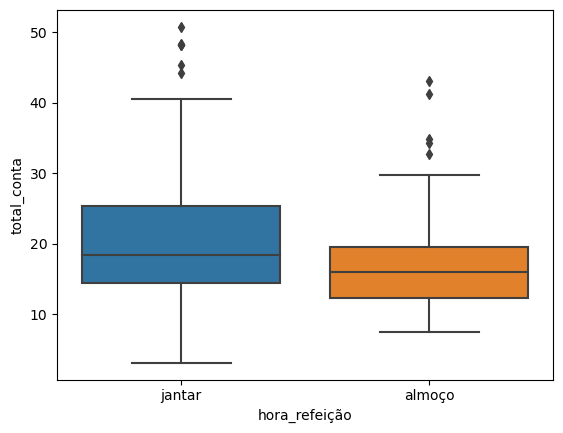

In [74]:
sns.boxplot(x='hora_refeição', y='total_conta', data=dados2)

In [75]:
almoco = dados2.query("hora_refeição == 'almoço'").total_conta

In [76]:
jantar = dados2.query("hora_refeição == 'jantar'").total_conta

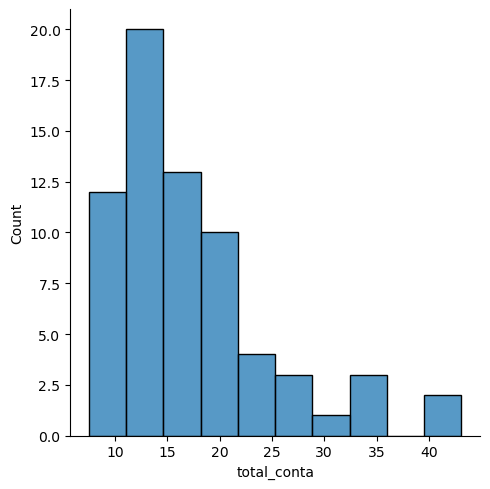

In [77]:
sns.displot(almoco)

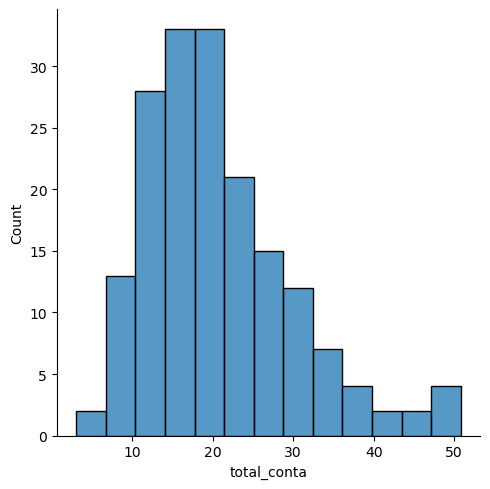

In [78]:
sns.displot(jantar)

In [80]:
dados2.groupby(['hora_refeição']).mean()[['total_conta', 'valor_gorjeta', 'porcentagem']]

,total_conta,valor_gorjeta,porcentagem
hora_refeição,,,
almoço,17.168676,2.728088,0.163971
jantar,20.797159,3.102670,0.159773


#### 3.2  Teste de hipótese

**H<sup>Null</sup>**

**A distribuição do valor da conta é igual no jantar e no almoço**

**H<sup>Alt</sup>**

**A distribuição do valor da conta não é igual no jantar e no almoço**

In [82]:
r2 = ranksums(jantar, almoco)
print('O valor do p-value é {}'.format(r2.pvalue))

O valor do p-value é 0.0011791039723641672


***H<sup>Alt</sup>***

***A distribuição do valor da conta não é igual no jantar e no almoço***

#### 3.3  Teste de hipótese

**H<sup>Null</sup>**

**A distribuição da taxa da gorjeta é igual no jantar e no almoço**

**H<sup>Alt</sup>**

**A distribuição da taxa da gorjeta não é igual no jantar e no almoço**

In [89]:
porcentagem_almoco = dados2.query("hora_refeição == 'almoço'").porcentagem

In [90]:
porcentagem_jantar = dados2.query("hora_refeição == 'jantar'").porcentagem

In [91]:
r3 = ranksums(porcentagem_almoco, porcentagem_jantar)
print('O valor do p-value é {}'.format(r3.pvalue))

O valor do p-value é 0.2602493995587126


***H<sup>Null</sup>***

***A distribuição da taxa da gorjeta é igual no jantar e no almoço***